<a href="https://colab.research.google.com/github/ZainabAbdulfatah25/my-data-analysis-projects/blob/main/Patient_Admission_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = ("/content/health_patient_dataset_ - health_patient_dataset_.csv")
df = pd.read_csv("/content/health_patient_dataset_ - health_patient_dataset_.csv")
print(df.head())

  Patient ID                   Name  Age  Gender        Date      Diagnosis  \
0   2B01B4E8         Bonnie Hawkins   70    Male  02/07/2024      Arthritis   
1   39C8F7CA          Douglas Smith   32  Female  30/04/2024            Flu   
2   B0810667         Isaac Martinez   58    Male  23/08/2024  Heart Disease   
3   1FF35B34         Brian Williams   21    Male  25/06/2023       COVID-19   
4   A126F755  Mrs. Alison Wright MD   18  Female  21/11/2024      Arthritis   

        Treatment Treatment Cost Admission Date Discharge Date  \
0  Rehabilitation           $335     16/02/2025     16/02/2025   
1         Surgery         $2,420     07/12/2023     09/12/2024   
2         Surgery         $4,494     21/10/2023     15/12/2023   
3     Observation         $4,176     02/06/2023     25/10/2024   
4         Surgery           $160     19/11/2023     19/07/2024   

   Hospital Stay (Days)  
0                     0  
1                   368  
2                    55  
3                   511 

In [ ]:
df.columns

Index(['Patient ID', 'Name', 'Age', 'Gender', 'Date', 'Diagnosis', 'Treatment',
       'Treatment Cost', 'Admission Date', 'Discharge Date',
       'Hospital Stay (Days)'],
      dtype='object')

In [ ]:
# Convert 'Treatment Cost' to numeric, removing '$' and ','
# Ensure the column is treated as string type before applying .str
df["Treatment Cost"] = df["Treatment Cost"].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False)
df["Treatment Cost"] = pd.to_numeric(df["Treatment Cost"])
print(df.head())
#calculate the mean treatment cost per diagnosis
top_diagnosis = df.groupby("Diagnosis")["Treatment Cost"].mean().sort_values(ascending=False)
print(top_diagnosis)


  Patient ID                   Name  Age  Gender       Date      Diagnosis  \
0   2B01B4E8         Bonnie Hawkins   70    Male 2024-02-07      Arthritis   
1   39C8F7CA          Douglas Smith   32  Female        NaT            Flu   
2   B0810667         Isaac Martinez   58    Male        NaT  Heart Disease   
3   1FF35B34         Brian Williams   21    Male        NaT       COVID-19   
4   A126F755  Mrs. Alison Wright MD   18  Female        NaT      Arthritis   

        Treatment  Treatment Cost Admission Date Discharge Date  \
0  Rehabilitation             335     2025-02-16     2025-02-16   
1         Surgery            2420     2023-12-07     2024-12-09   
2         Surgery            4494     2023-10-21     2023-12-15   
3     Observation            4176     2023-06-02     2024-10-25   
4         Surgery             160     2023-11-19     2024-07-19   

   Hospital Stay (Days) Admission Year-Month  
0                     0              2025-02  
1                   368           

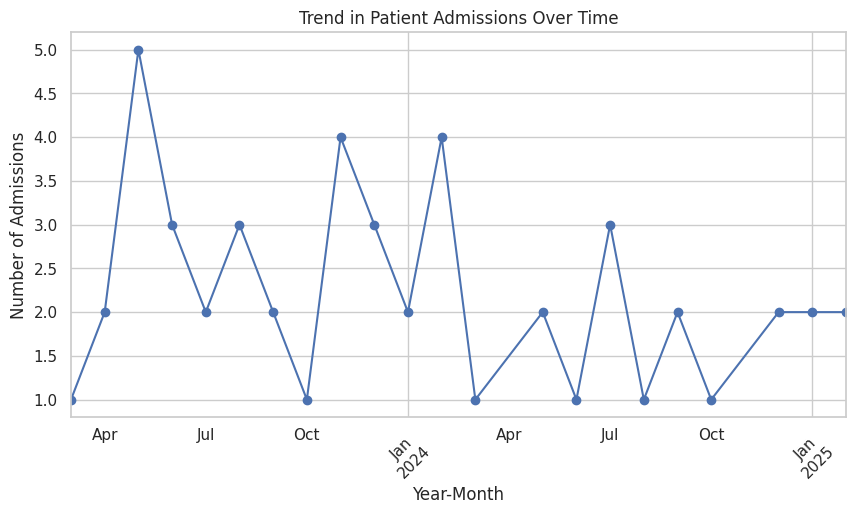

Correlation between Age and Hospital Stay: -0.4078771220263969

Top 5 Medical Conditions with Highest Treatment Costs:
Diagnosis
Asthma           3275.500000
COVID-19         3007.222222
Diabetes         2695.555556
Heart Disease    2590.666667
Flu              2406.500000
Name: Treatment Cost, dtype: float64


In [ ]:
# Convert date columns to datetime format
date_columns = ["Date", "Admission Date", "Discharge Date"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# 1. Trend in patient admissions over time
df["Admission Year-Month"] = df["Admission Date"].dt.to_period("M")
admission_trend = df["Admission Year-Month"].value_counts().sort_index()

# 2. Correlation between Age and Length of Stay
age_stay_corr = df[["Age", "Hospital Stay (Days)"]].corr().iloc[0, 1]

# 3. Medical conditions with the highest treatment costs
top_diagnoses = df.groupby("Diagnosis")["Treatment Cost"].mean().sort_values(ascending=False)

# Set plot style
sns.set(style="whitegrid")

# Plot patient admissions trend
plt.figure(figsize=(10, 5))
admission_trend.plot(kind="line", marker="o", title="Trend in Patient Admissions Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.show()

# Print the correlation and top medical conditions by cost
print("Correlation between Age and Hospital Stay:", age_stay_corr)
print("\nTop 5 Medical Conditions with Highest Treatment Costs:")
print(top_diagnoses.head(5))